# Gráficas y Coeficiente de Difusión

In [1]:
using DelimitedFiles
using Plots
pyplot()

Plots.PyPlotBackend()

In [2]:
info_aerolineas = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/aerolineas_matrices/nueva_lista_aerolineas_art.csv", ',', String)
lista_aerolineas = info_aerolineas[:, 2]

30-element Array{String,1}:
 "Airlines"     
 "global"       
 "Star_Alliance"
 "Sky_Team"     
 "oneworld"     
 "MU"           
 "CZ"           
 "AF"           
 "CA"           
 "KE"           
 "HU"           
 "CX"           
 "GS"           
 ⋮              
 "SC"           
 "HO"           
 "JD"           
 "KA"           
 "8L"           
 "MI"           
 "FD"           
 "PN"           
 "EU"           
 "NS"           
 "KY"           
 "BX"           

In [3]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR WUH

num_vuelos_directos = []

for k in 2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    archivo_rw_MX_inf_num = string(airline_code, "_cantidad_MX.csv")
   
    wuh_mx = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_rw_MX_inf_num", ',', Int64)
    
    push!(num_vuelos_directos, wuh_mx)
    
end

return num_vuelos_directos

29-element Array{Any,1}:
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 ⋮  
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]

In [4]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS

num_vuelos_infectados = []

for k in 2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    archivo_rw_inf_MX_num = string(airline_code, "_cantidad_inf_MX.csv")
   
    wuh_inf = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_rw_inf_MX_num", ',', Int64)
    
    push!(num_vuelos_infectados, wuh_inf)
    
end

return num_vuelos_infectados

29-element Array{Any,1}:
 [894]
 [936]
 [893]
 [744]
 [0]  
 [0]  
 [577]
 [566]
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 ⋮    
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  
 [0]  

In [5]:
#function coef_difusion()
redes_a_analizar = [2, 3, 4, 5, 8, 9]

for k in 1:6
       
    L = 0
    red = redes_a_analizar[k]
    airline_code = lista_aerolineas[red]
    aerolinea_carpeta = airline_code
    archivo_rw_inf_MX_num = string(airline_code, "_cantidad_inf_MX.csv") #nombre cantidad caminatas infectadas-MX
    archivo_rw_inf_MX_sub = string(airline_code, "_subconj_inf_MX.csv") #nombre subconjunto caminatas infectadas-MX
  
    n = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_rw_inf_MX_num", ',', Int64)
    S = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_rw_inf_MX_sub", ',', String)
       
    for i in 1:n[]
        
        if S[i, :][end] == " "
       
            L += (findfirst(x -> x == " ", S[i, :]) - 1)^2
            
            elseif S[i, :][end] != " "
            
            L += (1000)^2
        end
    end
    
    D = L / 2n[] 
    @show L
    @show D
   
    #archivo_coef_dif = string(airline_code, "_coef_difusion.csv") #nombre coef difusion
    #writedlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_coef_dif", D, ',')

end    

L = 729490726
D = 407992.5760626398
L = 750831010
D = 401084.94123931625
L = 494151547
D = 276680.5974244121
L = 148081358
D = 99517.04166666667
L = 293177444
D = 254053.24436741768
L = 566000000
D = 500000.0


In [6]:
Ls = []

0-element Array{Any,1}

## Histogramas caminatas infectadas

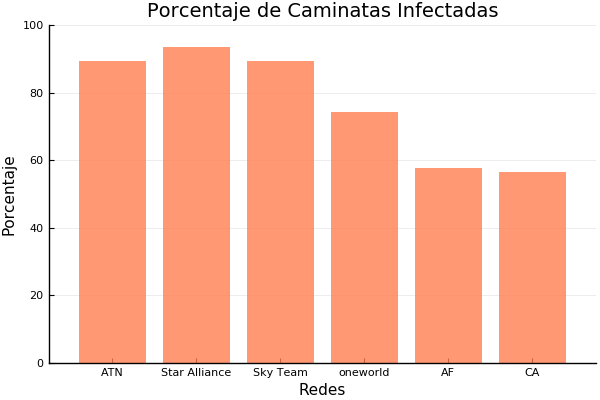

In [7]:
#Airlines porcentaje_WUH_inf_MX
aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]

graph = bar(aerolineas_inf, porcentaje_inf, 
    fillcolor = :coral, 
    alpha = 0.8,
    grid = :y,
    #markersize = 3, 
    linealpha = 0,
    title = "Porcentaje de Caminatas Infectadas",
    xlabel = "Redes",
    ylabel = "Porcentaje",
    legend = :none,
    #xlims = (-10,250), #obtener límites
    ylims = (0,100)) #obtener límites

## Cobertura de cada red

In [8]:
#LEO TODAS LAS COBERTURAS DEL VÉRTICE/AEROPUERTO WUH

coberturas_wuh = []

for k in 2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    archivo_cobertura_vertex = string(airline_code, "_vertex_coverage.csv")
   
    cobertura = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/cobertura/$archivo_cobertura_vertex", ',', Float64)
    
    push!(coberturas_wuh, cobertura[])
    
end

return coberturas_wuh

29-element Array{Any,1}:
 418.34 
 295.176
 243.242
 133.974
 148.012
 116.66 
 103.28 
 139.194
  99.903
  62.247
  93.714
  86.36 
  82.606
   ⋮    
  58.409
  52.773
  48.333
  46.997
  44.809
  44.999
  37.0  
  34.517
  31.98 
  28.982
  21.999
  15.0  

In [9]:
coberturas_wuh = convert(Array{Float64,1}, coberturas_wuh);

In [10]:
porcentaje_cobert = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/Articulo/Random_walks/Tabla_riesgo-mex/Porcentaje_coberturas.csv", '\t', Any)

30×3 Array{Any,2}:
    "Cobertura prom"  "Airlines"         "%Cobertura"
 418.34               "global"         13.6178       
 295.176              "Star Alliance"   9.60859      
 243.242              "Sky Team"        7.91803      
 133.974              "oneworld"        4.36113      
 148.012              "MU"              4.8181       
 116.66               "CZ"              3.79753      
 103.28               "AF"              3.36198      
 139.194              "CA"              4.53105      
  99.903              "KE"              3.25205      
  62.247              "HU"              2.02627      
  93.714              "CX"              3.05059      
  86.36               "GS"              2.8112       
   ⋮                                                 
  58.409              "SC"              1.90133      
  52.773              "HO"              1.71787      
  48.333              "JD"              1.57334      
  46.997              "KA"              1.52985      
  44.809 

In [11]:
porc = porcentaje_cobert[:,3][2:end];
porc = convert(Array{Float64,1}, porc);

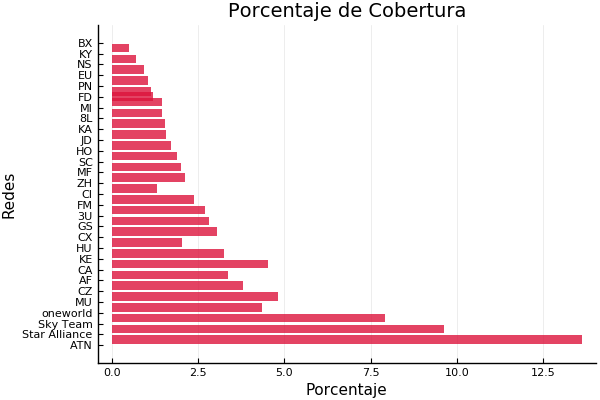

In [12]:
# COBERTURA DE CADA RED

aerolinea_red = ["ATN", "Star Alliance", "Sky Team", "oneworld", "MU", "CZ", "AF", "CA", "KE", 
    "HU", "CX", "GS", "3U", "FM", "CI", "ZH", "MF", "SC", "HO", "JD", "KA", "8L", "MI", "FD", 
    "FD", "PN", "EU", "NS", "KY", "BX"] #lista_aerolineas[2:end]
#@show aerolinea_red
cobertura_red = porc #coberturas_wuh
#@show cobertura_red

graph = bar(aerolinea_red, cobertura_red,   
    bar_width = 0.8,
    orientation = :horizontal,
    fillcolor = :crimson, 
    alpha = 0.8,
    grid = :x,
    #markersize = 3, 
    linealpha = 0,
    title = "Porcentaje de Cobertura",
    xlabel = "Porcentaje",
    ylabel = "Redes",
    xticks = :all,
    yticks = :all,
    tickfonthalign = :hcenter,
    tickfontvalign = :vcenter,
    #tick_direction = :out,
    legend = :none,
    xrotation = 0)
    #xlims = (-10,250), #obtener límites
    #ylims = (0,100)) #obtener límites

## Histograma por tiempos 
## ATN

In [13]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS

cantidad_infectados_t = []

for k = 2 #2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t

10-element Array{Int64,1}:
  85
 167
 260
 350
 442
 531
 617
 714
 806
 894

In [14]:
porcent_cant_inf = []

for j in 1:10
    
    push!(porcent_cant_inf, (cantidad_infectados_t[j] * 100) / 1000)
    
end

porcent_cant_inf = convert(Array{Float64, 1}, porcent_cant_inf)
    

10-element Array{Float64,1}:
  8.5
 16.7
 26.0
 35.0
 44.2
 53.1
 61.7
 71.4
 80.6
 89.4

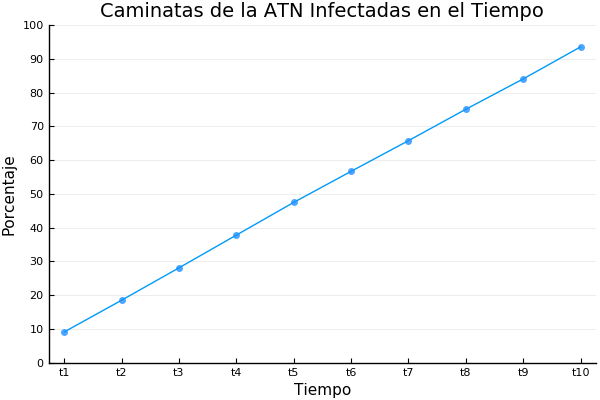

In [31]:
#aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
#porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]
xx = ["t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10"]

graph = plot(xx, porcent_cant_inf)
scatter!(xx, porcent_cant_inf, 
    #line=(:dot, 4),
    markersize = 5,
    markercolor = :dodgerblue,
    markerstrokealpha = 0,
    markerstrokewidth = 0,
    fillcolor = :coral, 
    alpha = 0.8,
    grid = :y,
    #markersize = 3, 
    #linealpha = 0,
    title = "Caminatas de la ATN Infectadas en el Tiempo",
    xlabel = "Tiempo",
    ylabel = "Porcentaje",
    legend = :none,
    yticks = 0:10:100,
    #xlims = (-10,250), #obtener límites
    ylims = (0,100)) #obtener límites


## Histograma por tiempos 
## Star Alliance

In [16]:
#LEO CANTIDAD DE CAMINATAS (DE 1000) QUE PASAN POR MÉXICO Y ES INFECTADO POR OTROS AEROPUERTOS INFECTADOS

cantidad_infectados_t = []

for k = 3 #2:length(lista_aerolineas)
    
    airline_code = lista_aerolineas[k]
    aerolinea_carpeta = airline_code
    
    for i in 1:10
    
        archivo_cantidad_t = string(airline_code, "_cantidad_inf_MX_t", i, ".csv")
        #@show archivo_cantidad_t
        cant_inf_t = readdlm("/Users/yuriko/Downloads/codejulia/datart/$aerolinea_carpeta/caminatas/$archivo_cantidad_t", ',', Int64)
        #@show cant_inf_t
        push!(cantidad_infectados_t, cant_inf_t[])
        
    end
    
   
end
cantidad_infectados_t = convert(Array{Int64, 1}, cantidad_infectados_t)
return cantidad_infectados_t

10-element Array{Int64,1}:
  91
 185
 281
 378
 475
 567
 658
 751
 841
 936

In [17]:
porcent_cant_inf = []

for j in 1:10
    
    push!(porcent_cant_inf, (cantidad_infectados_t[j] * 100) / 1000)
    
end

porcent_cant_inf = convert(Array{Float64, 1}, porcent_cant_inf)
    

10-element Array{Float64,1}:
  9.1
 18.5
 28.1
 37.8
 47.5
 56.7
 65.8
 75.1
 84.1
 93.6

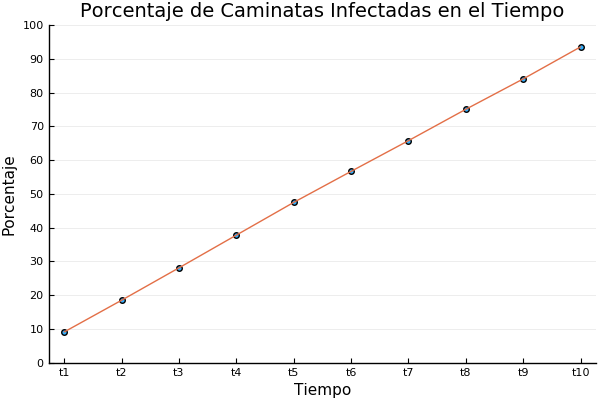

In [18]:
#aerolineas_inf = ["ATN", "Star Alliance", "Sky Team", "oneworld", "AF", "CA"]
#porcentaje_inf = [89.4, 93.6, 89.3, 74.4, 57.7, 56.6]
x = ["t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10"]

graph = scatter(x, porcent_cant_inf, 
    #line=(:dot, 4),
    #markersize = 4,
    #markerstrokestyle = :dot,
    fillcolor = :coral, 
    alpha = 0.8,
    grid = :y,
    #markersize = 3, 
    #linealpha = 0,
    title = "Porcentaje de Caminatas Infectadas en el Tiempo",
    xlabel = "Tiempo",
    ylabel = "Porcentaje",
    legend = :none,
    yticks = 0:10:100,
    #xlims = (-10,250), #obtener límites
    ylims = (0,100)) #obtener límites
plot!(x, porcent_cant_inf)
